In [1]:
from struct import unpack
import gzip
from numpy import zeros, uint8, float32

In [2]:
# Function for parsing in dataset
def get_labeled_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')

    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    for i in range(N):
        if i % 1000 == 0:
            print("i: %i" % i)
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                x[i][row][col] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x, y)

In [3]:
from pylab import imshow, show, cm

# Function for viewing images
def view_image(image, label=""):
    """View a single image."""
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()

In [7]:
# training set
training_set = get_labeled_data("train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz")
testing_set = get_labeled_data("t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz")

i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000
i: 51000
i: 52000
i: 53000
i: 54000
i: 55000
i: 56000
i: 57000
i: 58000
i: 59000
i: 0
i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000


Label: [5]


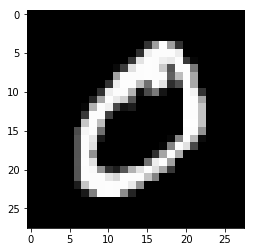

In [18]:
# Test two functions
training_set[0].shape
view_image(training_set[0][1],training_set[1][0])

In [21]:
import numpy as np
# reshape the 28x28 image data

training_img = np.reshape(training_set[0], (60000, 784))
print(training_img[0])
print("oldie:::::::::")
print(training_set[0][0])

# new training set after reshape
training_reshaped = (training_img, training_set[1])

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    3.   18.   18.   18.
  126.  136.  175.   26.  166.  255.  247.  127.   

In [24]:
# create a validation set of 1000
valid_size = 1000
training = (training_reshaped[0][: -valid_size], training_reshaped[1][: -valid_size])
validation = (training_reshaped[0][-valid_size:], training_reshaped[1][-valid_size:])

In [25]:
# create dictionary for recording size of each label
dict_size={}
for i in range(10):
    dict_size[i]=0
print(dict_size)

# get data size of each label
for label in np.nditer(training[1]):
    dict_size[int(label)]=dict_size[int(label)]+1
print(dict_size)

# create a list of 10 nparrays in order of label
ordered_train = {}
for i in range(10):
    ordered_train[i]=np.empty((0,784),float32)
print (len(ordered_train))
for img,label in zip(training[0], training[1]):
    ordered_train[label[0]] = np.append(ordered_train[label[0]],np.array([img]), axis=0)
        
for t in ordered_train:
    print(ordered_train[t].shape)
    

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
{0: 5825, 1: 6640, 2: 5853, 3: 6028, 4: 5746, 5: 5331, 6: 5811, 7: 6158, 8: 5757, 9: 5851}
10
(5825, 784)
(6640, 784)
(5853, 784)
(6028, 784)
(5746, 784)
(5331, 784)
(5811, 784)
(6158, 784)
(5757, 784)
(5851, 784)


In [231]:
cov_matrix_dict = {}
mean_dict = {}

# tuning this parameter
c=0.4

# start calculating mean and covariance matrix
for class_id, ts in ordered_train.items():
    # print(ts[255])
    cov_matrix = np.cov(ts, rowvar=False)
    # mean = np.mean(ts, axis=0)
    mean = np.array(ts.mean(0))
    # smooth cov matrix
    cov_matrix = cov_matrix + c * np.identity(784)
    cov_matrix_dict[class_id] = cov_matrix
    mean_dict[class_id] = mean

print(cov_matrix_dict[0].shape)
print(mean_dict[0].shape)

(784, 784)
(784,)


In [228]:
from scipy.stats import multivariate_normal

p_dict = {}
# calculate p
for i in range(0, 10):
    mean = mean_dict[i]
    cov = cov_matrix_dict[i]
    #print("mean.shape: "+ str(mean.shape))
    #print("mean value: " + str(mean[663]))
    #print("cov.shape: "+ str(cov.shape))
    p_dict[i]= multivariate_normal(mean=mean, cov=cov, allow_singular=False)

# x = np.random.rand(1,784)
x = np.linspace(0.0, 783, num=784)
# print("cov value: " + str(cov_matrix_dict[5][620][249]))
# print("mean value: " + str(mean_dict[5][220]))
# print(multivariate_normal.logpdf(x, mean=mean_dict[5], cov=cov_matrix_dict[5])) # number too small 

for i in p_dict:
    print(p_dict[i].logpdf(x))



-58631957.0242
-57987953.5449
-48401898.7498
-45037393.7796
-47616097.785
-40673204.0509
-75185642.1106
-30215883.625
-51274911.6426
-34919920.172


In [229]:
# calculate prior
prior_dict = {}
for i,size in dict_size.items():
    prior_dict[i] = dict_size[i]/(60000-valid_size)
print (prior_dict)

{0: 0.09872881355932203, 1: 0.11254237288135593, 2: 0.09920338983050847, 3: 0.10216949152542373, 4: 0.09738983050847458, 5: 0.09035593220338983, 6: 0.09849152542372881, 7: 0.1043728813559322, 8: 0.09757627118644067, 9: 0.09916949152542373}


# Start training in validation set

In [230]:
# for img, label in zip(validation[0], validation[1]):
correct_num = 0
for m in range(0, 999):
    img = validation[0][m]
    label = validation[1][m]
    bayes_prob = []
    # try each Pr
    for i in range(10):
        # print (p_dict[i].logpdf(img))
        prob = [i, prior_dict[i]*(p_dict[i].logpdf(img))]
        bayes_prob.append(prob)
    # print (bayes_prob)
    the_one = 0
    the_max = -9999999999
    for i in range(0, 9):
        if(bayes_prob[i][1] > the_max):
            the_max = bayes_prob[i][1]
            the_one = bayes_prob[i][0]
        
    #print ("Correct Label is " + str(label) + " Our guess is " + str(the_one))
    if(label == the_one):
        correct_num += 1
print(1 - correct_num/1000)


0.249
